In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

In [72]:
df_vaccinations = pd.read_csv("vaccinations.csv")
df_tweets = pd.read_csv("vaccination_all_tweets.csv")

In [73]:
df_vaccinations

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43434,Zimbabwe,ZWE,2021-08-24,3889424.0,2382059.0,1507365.0,NaN,60413.0,62638.0,25.77,15.78,9.99,NaN,4150.0
43435,Zimbabwe,ZWE,2021-08-25,4015517.0,2453229.0,1562288.0,NaN,126093.0,67597.0,26.61,16.25,10.35,NaN,4479.0
43436,Zimbabwe,ZWE,2021-08-26,NaN,NaN,NaN,NaN,NaN,60688.0,NaN,NaN,NaN,NaN,4021.0
43437,Zimbabwe,ZWE,2021-08-27,4075995.0,2491680.0,1584315.0,NaN,NaN,53784.0,27.01,16.51,10.50,NaN,3564.0


In [76]:
df_tweets

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False


In [75]:
df_tweets['date'] = df_tweets['date'].str.split(" ")
new_date = np.array(df_tweets['date'], dtype = list)
new_date_list = []
for el in new_date:
    new_date_list.append(el[0])
new_date_list = np.array(new_date_list)
df_tweets['date'] = new_date_list

In [37]:
df_tweets

In [77]:
df_vaccination_count = df_vaccinations.groupby(['date'], as_index = False).agg({'daily_vaccinations': 'sum'})
df_tweets_count = df_tweets.groupby('date', as_index = False).agg(tweets = ('date', 'count'))

In [80]:
df_vaccination_count

,date,daily_vaccinations
0,2020-12-02,0.0
1,2020-12-03,0.0
2,2020-12-04,0.0
3,2020-12-05,0.0
4,2020-12-06,0.0
...,...,...
265,2021-08-24,141618411.0
266,2021-08-25,144342936.0
267,2021-08-26,147456968.0
268,2021-08-27,148928388.0


In [81]:
df_tweets_count

,date,tweets
0,2020-12-12,63
1,2020-12-13,98
2,2020-12-14,137
3,2020-12-15,150
4,2020-12-16,144
...,...,...
314,2021-11-19,846
315,2021-11-20,765
316,2021-11-21,629
317,2021-11-22,612


In [82]:
df_all = df_vaccination_count.merge(df_tweets_count)

In [83]:
df_all

,date,daily_vaccinations,tweets
0,2020-12-12,15297.0,63
1,2020-12-13,50750.0,98
2,2020-12-14,139627.0,137
3,2020-12-15,371204.0,150
4,2020-12-16,580596.0,144
...,...,...,...
230,2021-08-24,141618411.0,860
231,2021-08-25,144342936.0,852
232,2021-08-26,147456968.0,1021
233,2021-08-27,148928388.0,928


Text(0, 0.5, 'Количество вакцинаций')

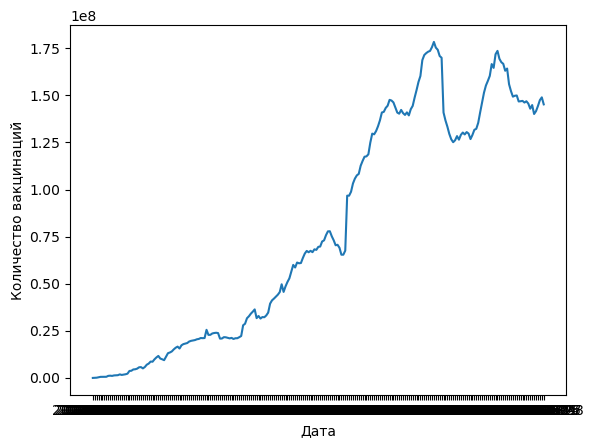

In [86]:
plt.plot(df_all['date'], df_all['daily_vaccinations'])
plt.xlabel('Дата')
plt.ylabel('Количество вакцинаций')

Text(0, 0.5, 'Количество твитов')

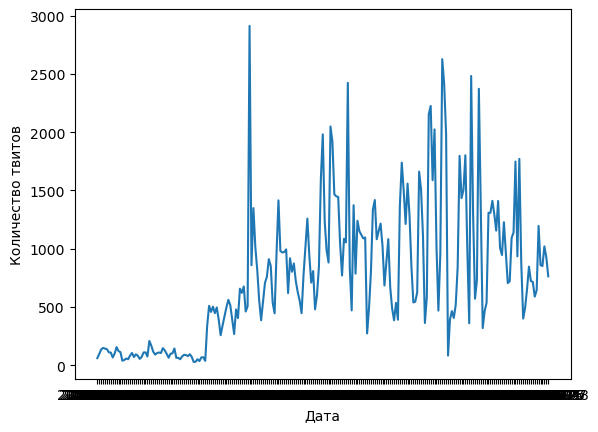

In [87]:
plt.plot(df_all['date'], df_all['tweets'])
plt.xlabel('Дата')
plt.ylabel('Количество твитов')

In [95]:
grangercausalitytests(df_all[['daily_vaccinations', 'tweets']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.2062  , p=0.3041  , df_denom=216, df_num=6
ssr based chi2 test:   chi2=7.6731  , p=0.2630  , df=6
likelihood ratio test: chi2=7.5473  , p=0.2732  , df=6
parameter F test:         F=1.2062  , p=0.3041  , df_denom=216, df_num=6


{6: ({'ssr_ftest': (1.2062455816462163, 0.3041306320531493, 216.0, 6),
   'ssr_chi2test': (7.673062172138431, 0.2630472234090606, 6),
   'lrtest': (7.547313462692728, 0.27317815150156993, 6),
   'params_ftest': (1.2062455816461852, 0.3041306320531648, 216.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [93]:
grangercausalitytests(df_all[['tweets', 'daily_vaccinations']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.1775  , p=0.0463  , df_denom=216, df_num=6
ssr based chi2 test:   chi2=13.8513 , p=0.0313  , df=6
likelihood ratio test: chi2=13.4486 , p=0.0364  , df=6
parameter F test:         F=2.1775  , p=0.0463  , df_denom=216, df_num=6


{6: ({'ssr_ftest': (2.177499897848298, 0.04629635034906273, 216.0, 6),
   'ssr_chi2test': (13.851318794646119, 0.031341836939186726, 6),
   'lrtest': (13.448573618365572, 0.03644053419094503, 6),
   'params_ftest': (2.177499897869916, 0.04629635034696343, 216.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

Для значение p = 0.05 делаем вывод, что количество твитов о вакицнациях зависит от количества вакцинаций, сделанных в день. То есть, условный "Аристарх" сначала читает Твиттер, а потом идёт вакцинироваться.